In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Wine.csv')
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


### Performing EDA and exploring relationship in the DATA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
 13  Customer_Segment      178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [4]:
df.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,1.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,1.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,1.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,2.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,3.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,3.000000


<AxesSubplot:>

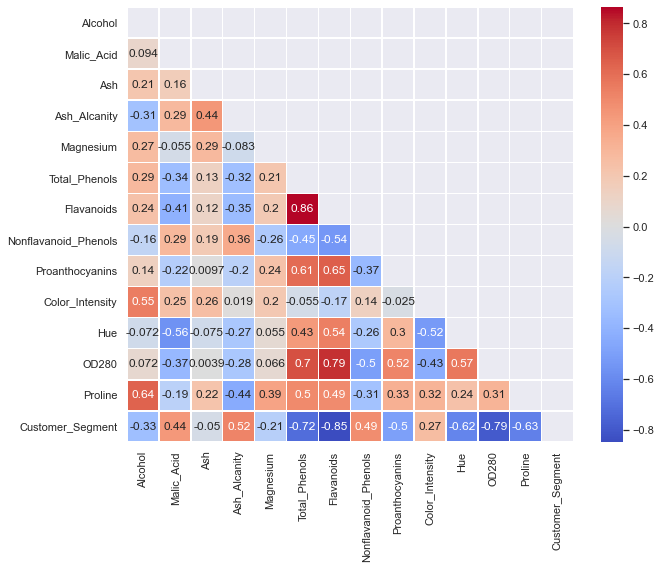

In [126]:
lower_matrix=np.triu(np.ones_like(df.corr()))
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),cmap='coolwarm',linewidth=0.5,annot=True,mask=lower_matrix)

*In this graph we can see a very high relation ship between phenol and Flavnoids as flavnoids constitute a major group of polyphenolic compounds.*

*Also the relationship between alcohol and Proline,Color Intensity is considerably strong as Proline is typically the most abundant amino acid present in grape juice and wine.*

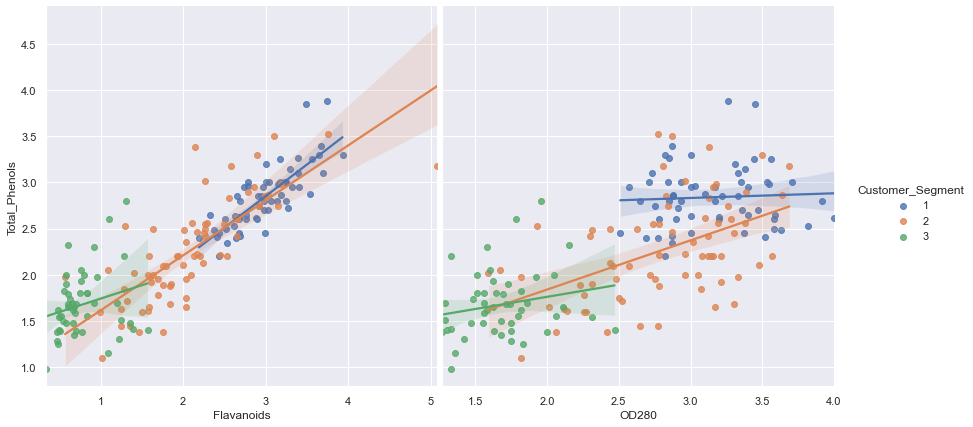

In [136]:
%matplotlib inline
sns.pairplot(df,x_vars=['Flavanoids','OD280'],y_vars=['Total_Phenols'],height=6,kind='reg',diag_kind=None,hue='Customer_Segment')

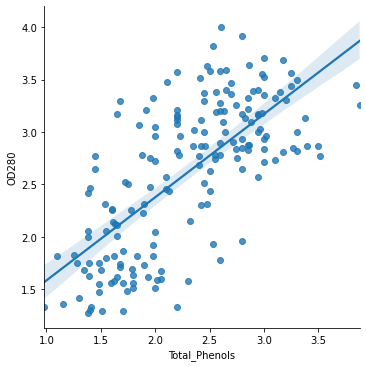

In [7]:
sns.lmplot(data=df,x='Total_Phenols',y='OD280')

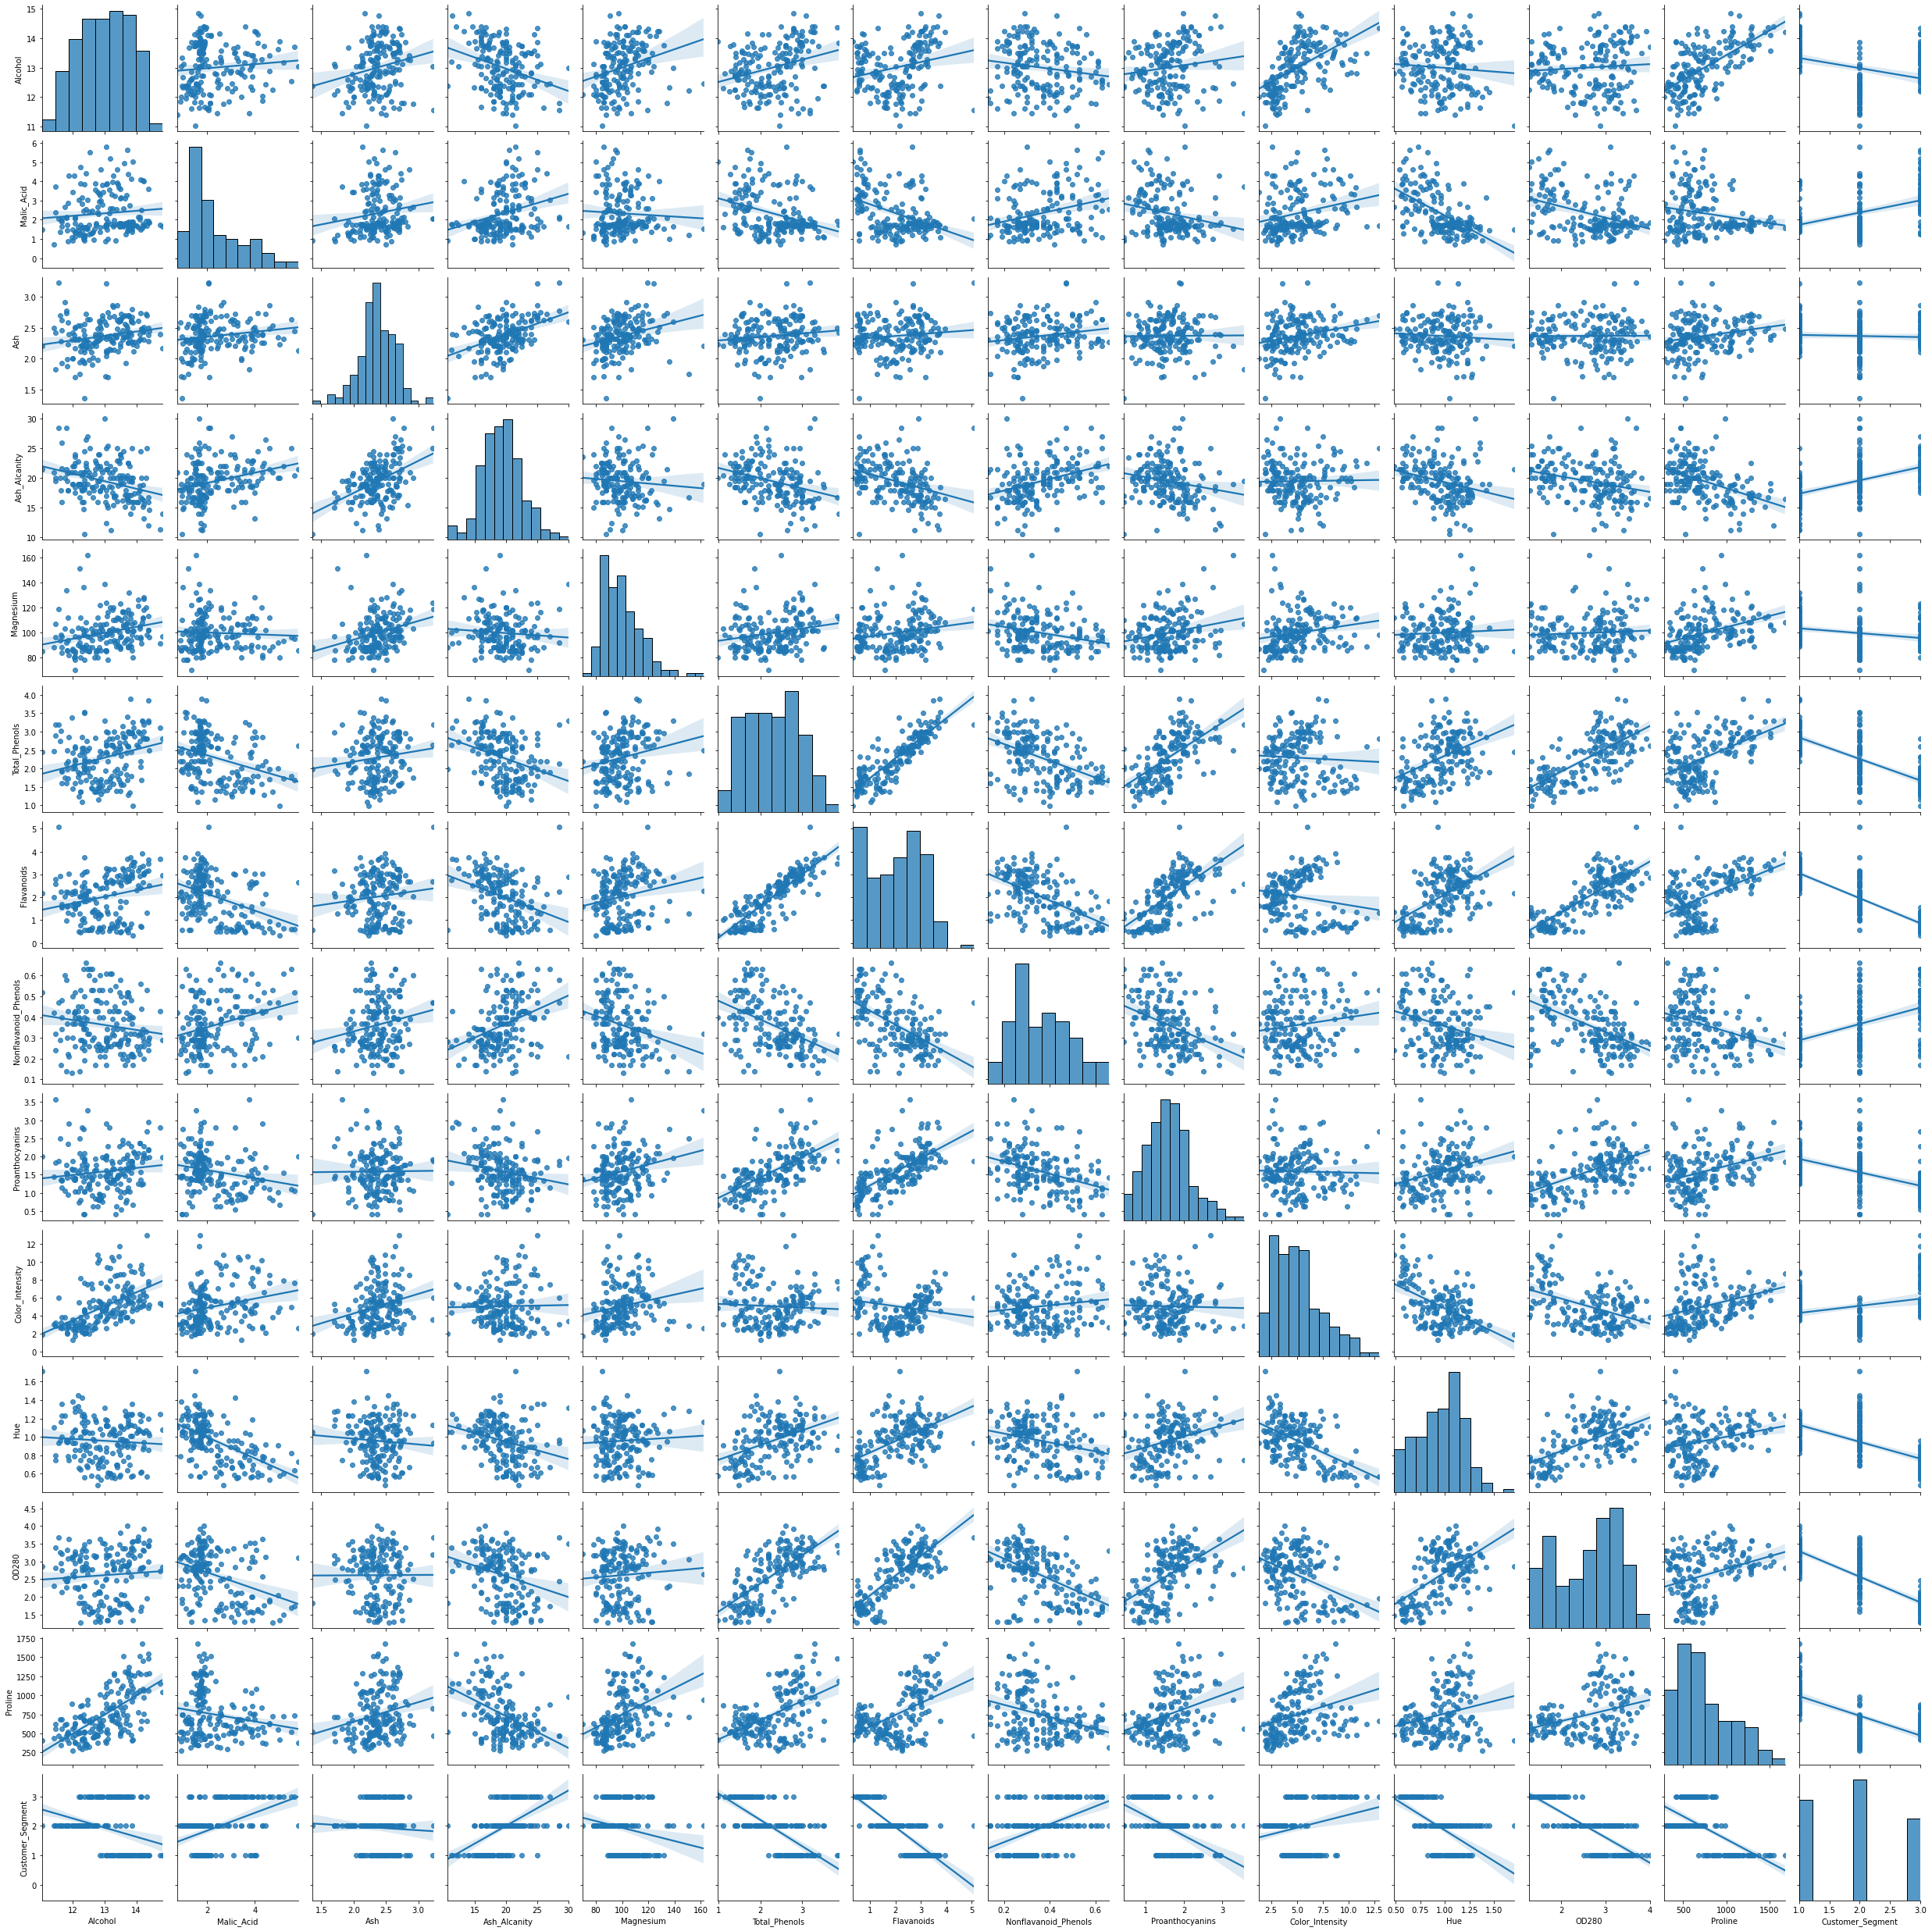

In [8]:
sns.pairplot(data=df,kind='reg')

In [9]:
df.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
Customer_Segment        0
dtype: int64

### We got no null values in the dataset columns

We will make copy of data so that if any changes tempers the data it will not affect the original data

In [10]:
df1 = df.copy()
df1.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


### We will apply PCA and find the optimum value for PCA

#### 1) We will first standardize the data

In [11]:
from sklearn.preprocessing import StandardScaler
features = []
for i in df.columns[:-1]:
    features.append(i)

In [12]:
x = df1.loc[:,features].values
y = df1.loc[:,['Customer_Segment']].values

In [13]:
x = StandardScaler().fit_transform(x)

#### 2) Now we will apply the PCA method by taking optimum number of columns as square root of total features standardized

In [15]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns=['principal Component1','principal Component2','principal Component3'])
finalDf = pd.concat([principalDf, df1[['Customer_Segment']]],axis=1)

In [17]:
finalDf.head()

,principal Component1,principal Component2,principal Component3,Customer_Segment
0,3.316751,-1.443463,-0.165739,1
1,2.209465,0.333393,-2.026457,1
2,2.516740,-1.031151,0.982819,1
3,3.757066,-2.756372,-0.176192,1
4,1.008908,-0.869831,2.026688,1


<AxesSubplot:ylabel='Density'>

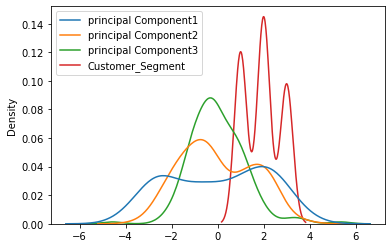

In [26]:
sns.kdeplot(data=finalDf)

Here we can see from density plot that data is now being standardized and scales(x,y) are also being adjusted for the same

<AxesSubplot:xlabel='principal Component1', ylabel='principal Component2'>

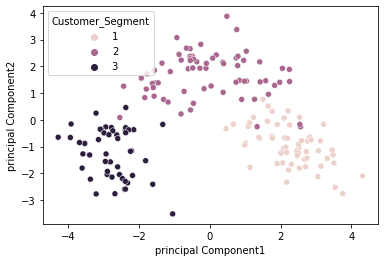

In [35]:
sns.scatterplot(data=finalDf,x='principal Component1',y='principal Component2',hue='Customer_Segment')

<AxesSubplot:xlabel='principal Component2', ylabel='principal Component3'>

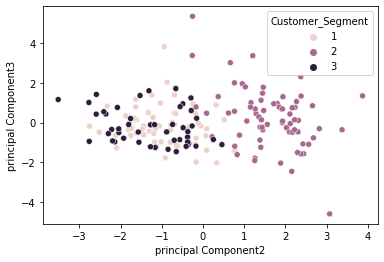

In [36]:
sns.scatterplot(data=finalDf,x='principal Component2',y='principal Component3',hue='Customer_Segment')

<AxesSubplot:xlabel='principal Component1', ylabel='principal Component3'>

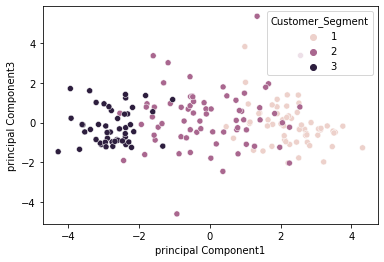

In [37]:
sns.scatterplot(data=finalDf,x='principal Component1',y='principal Component3',hue='Customer_Segment')

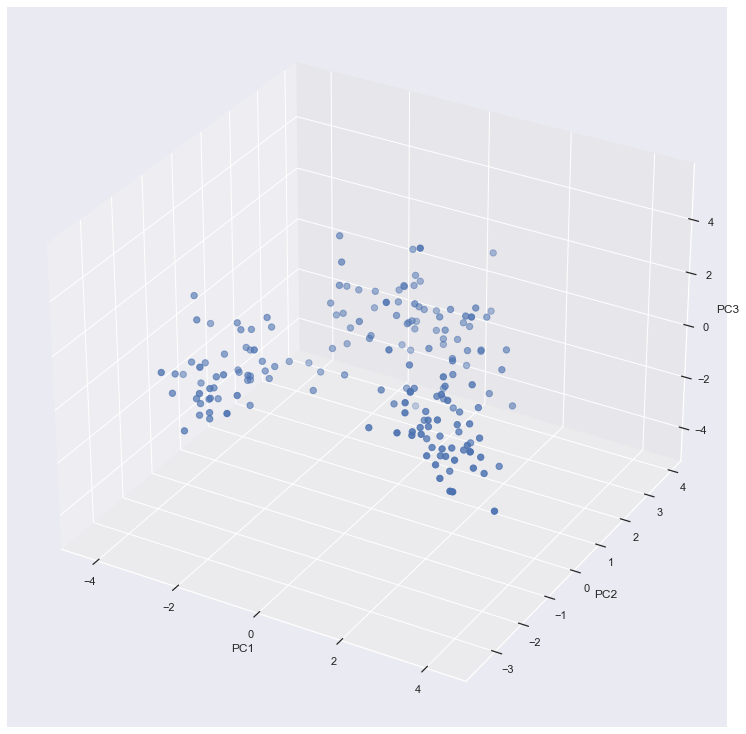

In [71]:
from mpl_toolkits.mplot3d import Axes3D
x=finalDf['principal Component1']
y=finalDf['principal Component2']
z=finalDf['principal Component3']
sns.set(style='darkgrid')
fig = plt.figure(figsize=(10,10))
ax = Axes3D(fig)
#ax = fig.add_subplot(111, projection = '3d')
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")


ax.scatter(x,y,z,s=40)
plt.show()

## Q3. Build a KNN classifier considering optimal number of principal components and value of K and state its score

In [72]:
from sklearn import neighbors

In [73]:
from sklearn.model_selection import train_test_split
X=finalDf.drop(['Customer_Segment'],axis=1)
y=finalDf['Customer_Segment']
X_train,X_test,y_train,y_test = train_test_split(X,y)

In [82]:
k_range = range(2,30)
score=[]
from sklearn.metrics import accuracy_score
for k in k_range:
    knn = neighbors.KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    ac = accuracy_score(y_pred,y_test)
    score.append(ac)
    print(f"{ac}-->{k}")

0.9333333333333333-->2
0.9333333333333333-->3
0.9333333333333333-->4
0.9777777777777777-->5
0.9777777777777777-->6
0.9777777777777777-->7
0.9777777777777777-->8
0.9555555555555556-->9
0.9777777777777777-->10
0.9555555555555556-->11
0.9555555555555556-->12
0.9555555555555556-->13
0.9555555555555556-->14
0.9555555555555556-->15
0.9555555555555556-->16
0.9555555555555556-->17
0.9777777777777777-->18
0.9555555555555556-->19
0.9777777777777777-->20
0.9555555555555556-->21
0.9777777777777777-->22
0.9777777777777777-->23
0.9777777777777777-->24
0.9777777777777777-->25
0.9777777777777777-->26
0.9777777777777777-->27
0.9777777777777777-->28
1.0-->29


We can see the best accuracy score is on k=5

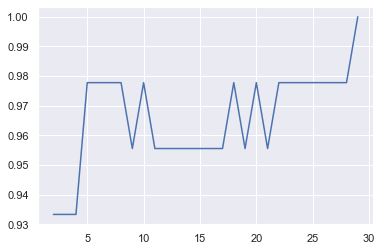

In [83]:
plt.plot(k_range, score)

## Q4. Build a SVM Classifier and tune the hyperparameters to get the optimum model.

In [137]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.svm import SVC

In [138]:
svc_classifier = SVC(kernel = 'linear')
svc_classifier.fit(X_train, y_train)
y_pred = svc_classifier.predict(X_test)
result = classification_report(y_test,y_pred)
print(result)
print(f"Accuracy score is {accuracy_score(y_test,y_pred)*100}%")

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        16
           3       1.00      1.00      1.00        16

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

Accuracy score is 100.0%


#### Radial classifier

In [139]:
svc_classifier = SVC(kernel = 'sigmoid')
svc_classifier.fit(X_train, y_train)
y_pred_sig = svc_classifier.predict(X_test)
result = classification_report(y_test,y_pred_sig)
print(result)
print(f"Accuracy score is {accuracy_score(y_test,y_pred_sig)*100}%")

              precision    recall  f1-score   support

           1       0.93      1.00      0.96        13
           2       1.00      0.88      0.93        16
           3       0.94      1.00      0.97        16

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.95        45

Accuracy score is 95.55555555555556%


#### Hyperparameter Tuning

In [148]:
from sklearn.model_selection import GridSearchCV 
   
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['sigmoid']}  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 
grid.fit(X_train, y_train)
y_pred_grid = grid.predict(X_test)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1, kernel=sigmoid ..................................
[CV] ...... C=0.1, gamma=1, kernel=sigmoid, score=0.815, total=   0.0s
[CV] C=0.1, gamma=1, kernel=sigmoid ..................................
[CV] ...... C=0.1, gamma=1, kernel=sigmoid, score=0.889, total=   0.0s
[CV] C=0.1, gamma=1, kernel=sigmoid ..................................
[CV] ...... C=0.1, gamma=1, kernel=sigmoid, score=0.926, total=   0.0s
[CV] C=0.1, gamma=1, kernel=sigmoid ..................................
[CV] ...... C=0.1, gamma=1, kernel=sigmoid, score=0.923, total=   0.0s
[CV] C=0.1, gamma=1, kernel=sigmoid ..................................
[CV] ...... C=0.1, gamma=1, kernel=sigmoid, score=0.731, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=sigmoid ................................
[CV] .... C=0.1, gamma=0.1, kernel=sigmoid, score=1.000, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=sigmoid ................................
[CV] .... C=0.1

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ..... C=1, gamma=0.01, kernel=sigmoid, score=0.923, total=   0.0s
[CV] C=1, gamma=0.001, kernel=sigmoid ................................
[CV] .... C=1, gamma=0.001, kernel=sigmoid, score=0.407, total=   0.0s
[CV] C=1, gamma=0.001, kernel=sigmoid ................................
[CV] .... C=1, gamma=0.001, kernel=sigmoid, score=0.407, total=   0.0s
[CV] C=1, gamma=0.001, kernel=sigmoid ................................
[CV] .... C=1, gamma=0.001, kernel=sigmoid, score=0.407, total=   0.0s
[CV] C=1, gamma=0.001, kernel=sigmoid ................................
[CV] .... C=1, gamma=0.001, kernel=sigmoid, score=0.423, total=   0.0s
[CV] C=1, gamma=0.001, kernel=sigmoid ................................
[CV] .... C=1, gamma=0.001, kernel=sigmoid, score=0.423, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=sigmoid ...............................
[CV] ... C=1, gamma=0.0001, kernel=sigmoid, score=0.407, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=sigmoid ...............................
[CV] .

[CV]  C=1000, gamma=0.0001, kernel=sigmoid, score=0.926, total=   0.0s
[CV] C=1000, gamma=0.0001, kernel=sigmoid ............................
[CV]  C=1000, gamma=0.0001, kernel=sigmoid, score=0.963, total=   0.0s
[CV] C=1000, gamma=0.0001, kernel=sigmoid ............................
[CV]  C=1000, gamma=0.0001, kernel=sigmoid, score=1.000, total=   0.0s
[CV] C=1000, gamma=0.0001, kernel=sigmoid ............................
[CV]  C=1000, gamma=0.0001, kernel=sigmoid, score=0.923, total=   0.0s


[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:    0.5s finished


In [149]:
print(grid.best_params_) 
print(grid.best_estimator_) 

{'C': 10, 'gamma': 0.1, 'kernel': 'sigmoid'}
SVC(C=10, gamma=0.1, kernel='sigmoid')


In [147]:
print(classification_report(y_test, y_pred_grid)) 

              precision    recall  f1-score   support

           1       0.93      1.00      0.96        13
           2       1.00      0.94      0.97        16
           3       1.00      1.00      1.00        16

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



### Here we increased our accuracy of sigmoid kernel from 95% to 98%

## Q5. Build a Naive Bayes Classifier and comment about its accuracy

In [128]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train,y_train)
y_pred = nb.predict(X_test)
nb.score(y_pred,y_test)

ValueError: Negative values in data passed to MultinomialNB (input X)

**As we are getting error here because we have negative values in our X dataframe so we will use gaussian naive bayes**

In [133]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train,y_train)
y_pred = gnb.predict(X_test)
gnb.score(X_test,y_test)

1.0

In [134]:
gnb.score(X_train,y_train)

0.9699248120300752

In [135]:
accuracy_score(y_pred,y_test)

1.0

## Q6.Compare all of the models and justify your choice about the optimum model

We have applied multiple models and due to lack of data means we dont have many rows to test and train the model more. So this condition lead to over fitting of models in many parts but KNN is the best suited model in this wine data.